In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PostSW

C:\Users\Lyle\Documents\Files\DeCoDE\Bike Project\FRAMED\PostSW.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
#Load resolution study data into confs list

resnames=[128,905,64,452,32,226,16,113,8,56,4,28,2,14,1]
resolutions=[128,90.5096,64,45.2548,32,22.6274,16,11.3137, 8,5.6568,4,2.8284,2,1.4142,1]
confs=list(np.zeros(len(resolutions)))
for i in range(len(resolutions)):
    file="Convergence/conv_%d.csv" % (resnames[i])
    indices=[45,1532,3412,2389,4007]
    data=PostSW.extract_data(file, indices, 0)
    data=PostSW.calcQOA(data)
    confs[i]=data
#     print(np.shape(data))

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Lyle\anaconda3\envs\tabgen\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Lyle\anaconda3\envs\tabgen\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Lyle\Documents\Files\DeCoDE\Bike Project\FRAMED\PostSW.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Sim 3 Bottom Bracket Y Disp."].iloc[i]=(data.loc[:,"Sim 3 Bottom Bracket L Disp."].iloc[i]+data.loc[:,"Sim 3 Bottom Bracket R Disp."].iloc[i])/2
C:\Users\Lyle\Documents\Files\DeCoDE\Bike Project\FRAMED\PostSW.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Sim 3 Bottom Bracket X Rot."].iloc[i]=(data.loc[:,"Sim 3 Bottom Bracket L Disp."].iloc[i]-data.loc[:,"Sim 3 Bottom Bracket R Disp."].iloc[i])/.14
C:\Users\Lyle\anaconda3\envs\tabgen\lib\site-packages\pandas\core\frame.p

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

Calculating Quanitities of Interest from Sim Output:   0%|          | 0/5 [00:00<?, ?it/s]

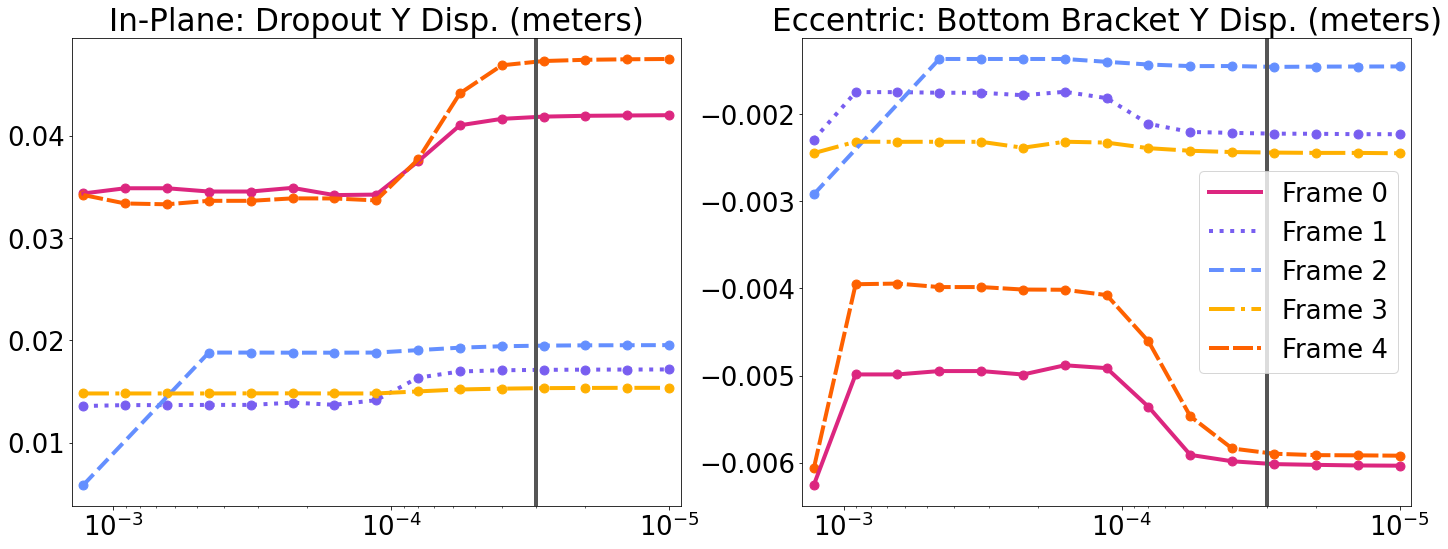

In [5]:
fig = plt.figure(figsize=(24,50))
plt.rcParams.update({'font.size': 26})
size=80
linewidth=4

# fig = plt.figure(figsize=(24,24))
# plt.rcParams.update({'font.size': 16})
# size=50
# linewidth=2

scaling_factor=100000
x_subplots=2
y_subplots=5
units=["meters", "meters", "meters", "meters", "meters", "meters", "radians", "N/A", "N/A", "Kilograms"]
colors=["#DC267F", "#785EF0", "#648FFF", "#FFB000", "#FE6100"]
linestyles=["solid","dotted", "dashed", "dashdot",(0,(5,1))]

# propslist=confs[0].columns[-12:]

propslist=confs[0][["Sim 1 Dropout Y Disp.", "Sim 3 Bottom Bracket Y Disp."]].columns
# print(propslist)
names=confs[0].columns

for i in range(len(propslist)):
    ax = fig.add_subplot(y_subplots, x_subplots, i+1)
    ax.set_xscale('log')
    ax.set_xlim(1.28/1000*1.1, .01/1000/1.1)
    prop=np.zeros((5, len(resolutions)))
    for k in range(len(confs[0][propslist[i]].values)):
        x=[]
        y=[]
        for j in range(len(resolutions)):
            value=confs[j][propslist[i]].values[k]
            if type(value)==float or type(value)==np.float64:
                x.append(resolutions[j]/scaling_factor)
                y.append(value)
        plt.scatter(x, y, c=colors[k], s=size)
        plt.plot(x, y, c=colors[k], linewidth=linewidth, linestyle=linestyles[k], label="Frame " + str(k))
        plt.axvline(x=0.00003, color="#555555", linewidth=linewidth)
        if i==0:
            plt.title("In-Plane: Dropout Y Disp." + " (" + units[i] + ")")
        if i==1:
            plt.title("Eccentric: Bottom Bracket Y Disp." + " (" + units[i] + ")")
#             plt.title(names[i] + " (" + units[i] + ")")
#             plt.xlabel("Mesh Resolution (m)")
ax.legend()
plt.show()